<a href="https://colab.research.google.com/github/dian-wijayanti/DOKUMEN-TESIS/blob/main/Dokumentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Dataset, Karakteristik Data, Implikasi Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# File akan tersedia di /content/drive/My Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Analisis Dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ukuran dataset: (1243, 68)

Beberapa baris awal:
                                             address            categories/0  \
0  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
1  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
2  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
3  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
4  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   

             categoryName                   cid              city countryCode  \
0  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
1  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
2  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
3  Rumah Sakit Pe

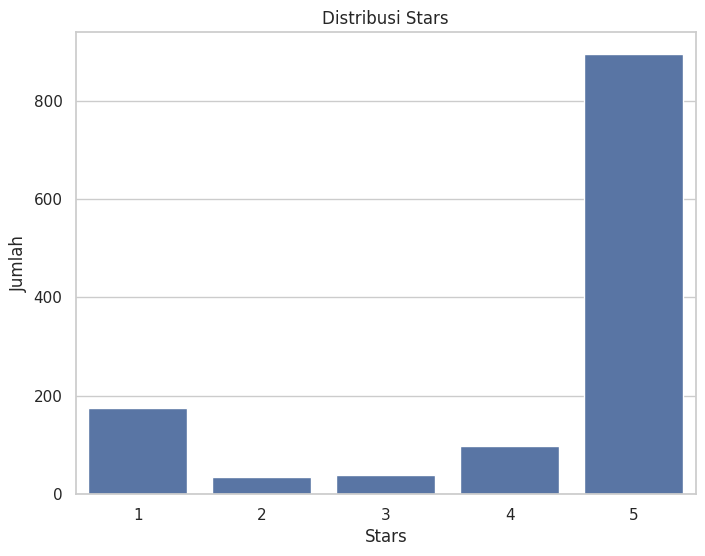

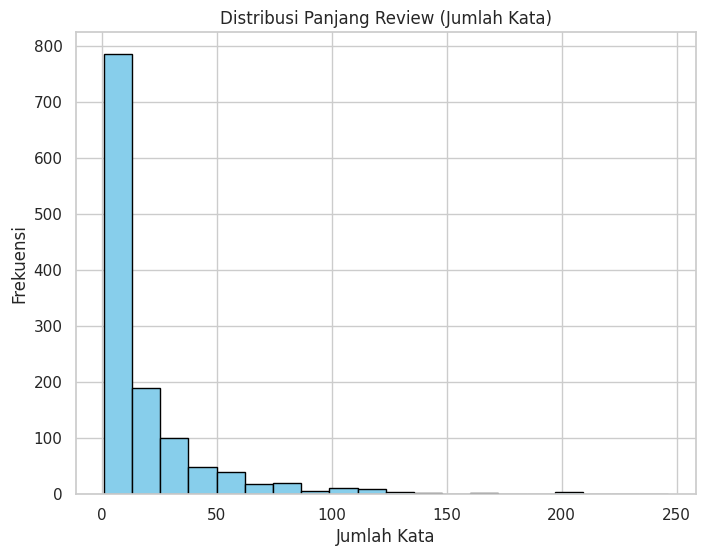

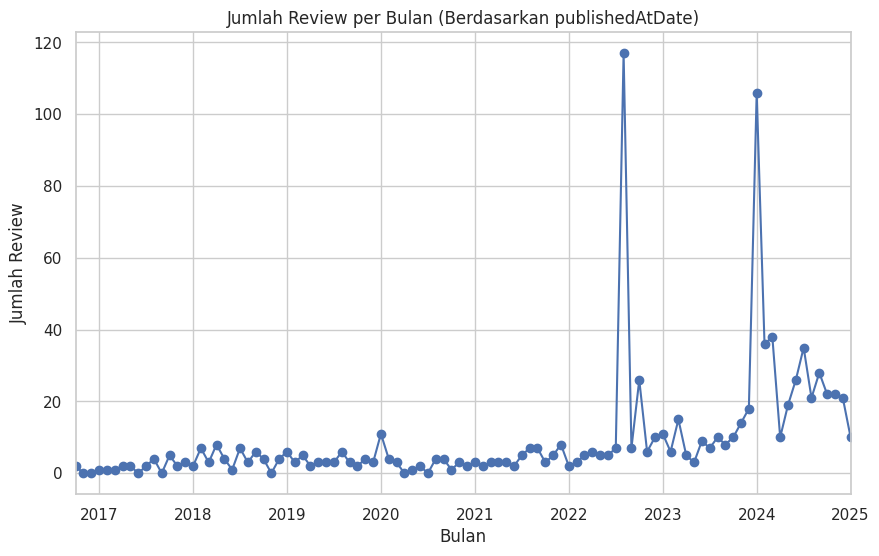

In [15]:
# Jika menggunakan Google Colab, mount Google Drive terlebih dahulu:
from google.colab import drive
drive.mount('/content/drive')

# Import pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set(style="whitegrid")

# Path file dataset
file_path = '/content/drive/My Drive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Menghapus duplikasi jika diperlukan
df_no_duplicates = df.drop_duplicates()

# Menampilkan informasi dasar dataset
print("Ukuran dataset:", df_no_duplicates.shape)
print("\nBeberapa baris awal:")
print(df_no_duplicates.head())

# Menampilkan informasi tipe data dan nilai yang hilang
print("\nInformasi dataset:")
df_no_duplicates.info()

print("\nJumlah nilai yang hilang per kolom:")
print(df_no_duplicates.isnull().sum())

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif:")
print(df_no_duplicates.describe())

# Visualisasi distribusi 'stars' (karena kolom 'rating' kosong)
if 'stars' in df_no_duplicates.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='stars', data=df_no_duplicates)
    plt.title('Distribusi Stars')
    plt.xlabel('Stars')
    plt.ylabel('Jumlah')
    plt.show()

# Analisis tambahan: Distribusi panjang review menggunakan kolom 'text'
if 'text' in df_no_duplicates.columns:
    # Menghitung panjang review dalam jumlah kata
    df_no_duplicates['review_length'] = df_no_duplicates['text'].astype(str).apply(lambda x: len(x.split()))

    plt.figure(figsize=(8, 6))
    plt.hist(df_no_duplicates['review_length'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribusi Panjang Review (Jumlah Kata)')
    plt.xlabel('Jumlah Kata')
    plt.ylabel('Frekuensi')
    plt.show()

# Analisis waktu: Gunakan kolom 'publishedAtDate' untuk analisis waktu
if 'publishedAtDate' in df_no_duplicates.columns:
    # Konversi kolom publishedAtDate ke format datetime dengan timezone UTC
    df_no_duplicates['publishedAtDate'] = pd.to_datetime(df_no_duplicates['publishedAtDate'], utc=True, errors='coerce')

    # Cek apakah terdapat data tanggal yang valid
    if df_no_duplicates['publishedAtDate'].notnull().sum() > 0:
        # Hapus baris dengan nilai NaT dan urutkan berdasarkan tanggal
        df_no_duplicates = df_no_duplicates.dropna(subset=['publishedAtDate']).sort_values('publishedAtDate')

        plt.figure(figsize=(10, 6))
        # Resampling dengan frekuensi 'ME' (Month End) untuk menghindari peringatan
        df_no_duplicates.set_index('publishedAtDate')['text'].resample('ME').count().plot(marker='o')
        plt.title('Jumlah Review per Bulan (Berdasarkan publishedAtDate)')
        plt.xlabel('Bulan')
        plt.ylabel('Jumlah Review')
        plt.show()
    else:
        print("Tidak ada data tanggal yang valid pada kolom publishedAtDate.")
else:
    print("Kolom publishedAtDate tidak tersedia di dataset.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ukuran dataset: (1243, 68)

Beberapa baris awal:
                                             address            categories/0  \
0  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
1  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
2  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
3  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
4  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   

             categoryName                   cid              city countryCode  \
0  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
1  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
2  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
3  Rumah Sakit Pe

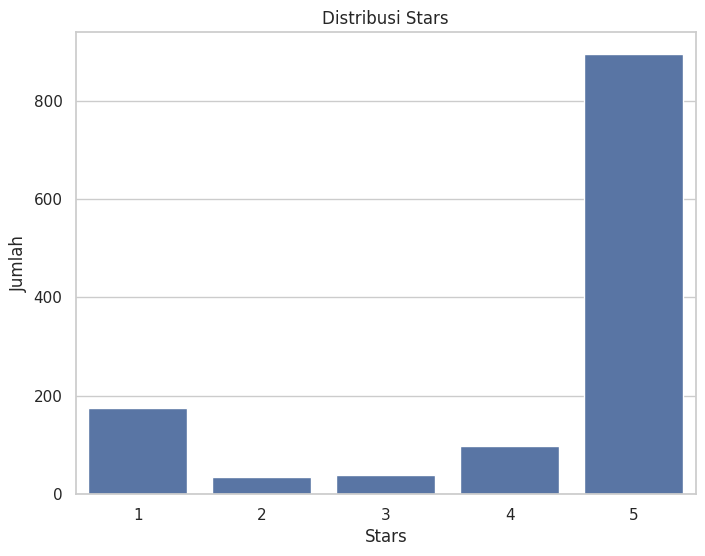

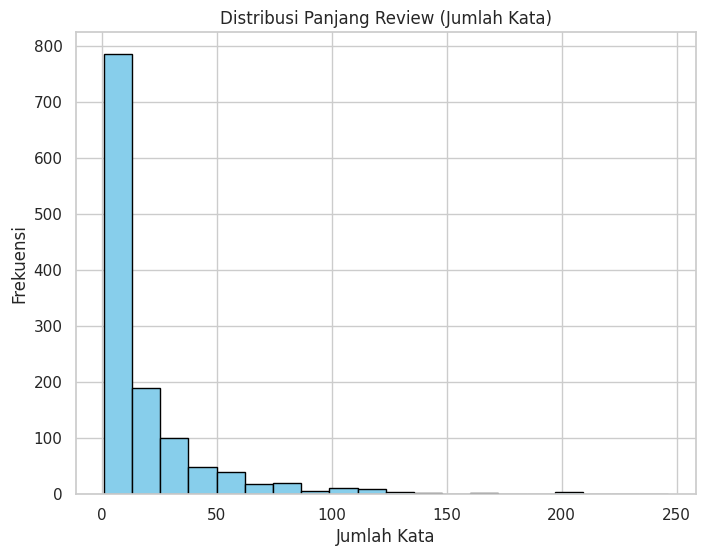

Tidak ada data tanggal yang valid pada kolom publishAt.


In [14]:
# Jika menggunakan Google Colab, mount Google Drive terlebih dahulu:
from google.colab import drive
drive.mount('/content/drive')

# Import pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set(style="whitegrid")

# Path file dataset
file_path = '/content/drive/My Drive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan informasi dasar dataset
print("Ukuran dataset:", df.shape)
print("\nBeberapa baris awal:")
print(df.head())

# Menampilkan informasi tipe data dan nilai yang hilang
print("\nInformasi dataset:")
df.info()

print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif:")
print(df.describe())

# Visualisasi distribusi 'stars' (karena kolom 'rating' kosong)
if 'stars' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='stars', data=df)
    plt.title('Distribusi Stars')
    plt.xlabel('Stars')
    plt.ylabel('Jumlah')
    plt.show()

# Analisis tambahan: Distribusi panjang review menggunakan kolom 'text'
if 'text' in df.columns:
    # Menghitung panjang review dalam jumlah kata
    df['review_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

    plt.figure(figsize=(8, 6))
    plt.hist(df['review_length'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribusi Panjang Review (Jumlah Kata)')
    plt.xlabel('Jumlah Kata')
    plt.ylabel('Frekuensi')
    plt.show()

# Analisis waktu: Jumlah review per bulan menggunakan kolom 'publishAt'
if 'publishAt' in df.columns:
    # Ubah kolom publishAt menjadi datetime dengan format yang sesuai (ubah format sesuai kebutuhan)
    df['publishAt'] = pd.to_datetime(df['publishAt'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

    # Cek apakah terdapat data tanggal yang valid
    if df['publishAt'].notnull().sum() > 0:
        # Hapus baris dengan nilai NaT dan urutkan berdasarkan tanggal
        df = df.dropna(subset=['publishAt']).sort_values('publishAt')

        plt.figure(figsize=(10, 6))
        # Resampling dengan frekuensi 'ME' (Month End) untuk menghindari peringatan
        df.set_index('publishAt')['text'].resample('ME').count().plot(marker='o')
        plt.title('Jumlah Review per Bulan')
        plt.xlabel('Bulan')
        plt.ylabel('Jumlah Review')
        plt.show()
    else:
        print("Tidak ada data tanggal yang valid pada kolom publishAt.")


In [ ]:
import pandas as pd

# Membaca file Excel
df = pd.read_excel('/content/drive/My Drive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.xlsx')

# Menampilkan data
print(df.head())

                                             address            categories/0  \
0  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
1  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
2  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
3  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
4  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   

             categoryName                   cid              city countryCode  \
0  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
1  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
2  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
3  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
4  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   

                                

In [ ]:
# Import modul datetime
from datetime import datetime

# Hitung distribusi dan persentase
distribusi = df['stars'].value_counts().sort_index()
persentase = (distribusi / len(df) * 100).round(1)

# Buat dokumentasi dalam format markdown
dokumentasi = f"""# Dokumentasi Analisis Google Review
Tanggal: {datetime.now().strftime('%d %B %Y')}

## Informasi Dataset
- Total data: {len(df)} reviews
- Jumlah kolom: {len(df.columns)}
- Nama kolom: {', '.join(df.columns)}

## Distribusi Rating
| Rating | Jumlah | Persentase |
|--------|--------|------------|
| 1 | {distribusi.get(1, 0)} | {persentase.get(1, 0.0)}% |
| 2 | {distribusi.get(2, 0)} | {persentase.get(2, 0.0)}% |
| 3 | {distribusi.get(3, 0)} | {persentase.get(3, 0.0)}% |
| 4 | {distribusi.get(4, 0)} | {persentase.get(4, 0.0)}% |
| 5 | {distribusi.get(5, 0)} | {persentase.get(5, 0.0)}% |

## Statistik Rating
- Rata-rata rating: {df['stars'].mean():.2f}
- Rating minimum: {df['stars'].min()}
- Rating maksimum: {df['stars'].max()}
"""

# Simpan dokumentasi ke file
output_path = '/content/documentation/dokumentasi_analisis.md'
# Pastikan direktori tujuan sudah ada
import os
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with open(output_path, 'w') as f:
    f.write(dokumentasi)

# Tampilkan isi dokumentasi
print(dokumentasi)

# Dokumentasi Analisis Google Review
Tanggal: 18 February 2025

## Informasi Dataset
- Total data: 1243 reviews
- Jumlah kolom: 68
- Nama kolom: address, categories/0, categoryName, cid, city, countryCode, fid, imageUrl, isAdvertisement, isLocalGuide, likesCount, location/lat, location/lng, name, neighborhood, permanentlyClosed, placeId, postalCode, price, publishAt, publishedAtDate, rating, responseFromOwnerDate, responseFromOwnerText, reviewId, reviewImageUrls/0, reviewImageUrls/1, reviewImageUrls/2, reviewImageUrls/3, reviewImageUrls/4, reviewImageUrls/5, reviewImageUrls/6, reviewImageUrls/7, reviewImageUrls/8, reviewImageUrls/9, reviewImageUrls/10, reviewImageUrls/11, reviewImageUrls/12, reviewImageUrls/13, reviewImageUrls/14, reviewImageUrls/15, reviewImageUrls/16, reviewImageUrls/17, reviewImageUrls/18, reviewImageUrls/19, reviewImageUrls/20, reviewImageUrls/21, reviewImageUrls/22, reviewImageUrls/23, reviewImageUrls/24, reviewImageUrls/25, reviewOrigin, reviewUrl, reviewerId, re

In [ ]:
import pandas as pd
from datetime import datetime
import os

# Pastikan folder untuk menyimpan dokumentasi sudah ada
os.makedirs('/content/documentation', exist_ok=True)

# Contoh: Memuat dataset ke dalam DataFrame (sesuaikan dengan dataset Anda)
# Ganti 'google_reviews.csv' dengan nama file dataset Anda
df = pd.DataFrame({
    'text': [
        "Sangat puas dengan layanan ini!",
        "Biasa saja.",
        "Pengalaman buruk, tidak akan kembali lagi.",
        "Luar biasa, sangat membantu."
    ]
})

# Hitung panjang teks review
df['panjang_teks'] = df['text'].str.len()

# Tambahkan analisis teks ke dokumentasi
dokumentasi_lanjutan = f"""# Dokumentasi Analisis Google Review
Tanggal: {datetime.now().strftime('%d %B %Y')}

## Informasi Dataset
- Total data: {len(df)} reviews
- Jumlah kolom: {len(df.columns)}
- Nama kolom: {', '.join(df.columns)}

## Analisis Teks Review
- Rata-rata panjang review: {df['panjang_teks'].mean():.0f} karakter
- Review terpendek: {df['panjang_teks'].min()} karakter
- Review terpanjang: {df['panjang_teks'].max()} karakter
"""

# Simpan dokumentasi yang diperbarui
with open('/content/documentation/dokumentasi_analisis.md', 'w') as f:
    f.write(dokumentasi_lanjutan)

# Tampilkan dokumentasi yang diperbarui
print(dokumentasi_lanjutan)

# Dokumentasi Analisis Google Review
Tanggal: 18 February 2025

## Informasi Dataset
- Total data: 4 reviews
- Jumlah kolom: 2
- Nama kolom: text, panjang_teks

## Analisis Teks Review
- Rata-rata panjang review: 28 karakter
- Review terpendek: 11 karakter
- Review terpanjang: 42 karakter



In [ ]:
from datetime import datetime
import pandas as pd

# Hitung ulasan kosong (empty reviews)
ulasan_kosong = df['text'].isna().sum()  # untuk NULL/NaN
ulasan_kosong_str = df['text'].str.strip().eq('').sum()  # untuk string kosong
total_ulasan_kosong = ulasan_kosong + ulasan_kosong_str

# Hitung ulasan duplikat menggunakan drop_duplicates (sama dengan koding kedua)
df_clean = df.drop_duplicates(subset=['text'])
ulasan_duplikat = len(df) - len(df_clean)

dokumentasi = f"""# Dokumentasi Analisis Google Review
Tanggal: {datetime.now().strftime('%d %B %Y')}

## Informasi Dataset
- Total data: {len(df)} reviews
- Jumlah kolom: {len(df.columns)}
- Nama kolom: {', '.join(df.columns)}

## Analisis Kualitas Data
- Jumlah ulasan kosong: {total_ulasan_kosong} reviews
  - NULL/NaN: {ulasan_kosong} reviews
  - String kosong: {ulasan_kosong_str} reviews
- Jumlah ulasan duplikat: {ulasan_duplikat} reviews
- Persentase ulasan kosong: {(total_ulasan_kosong/len(df)*100):.1f}%
- Persentase ulasan duplikat: {(ulasan_duplikat/len(df)*100):.1f}%

## Ringkasan Data Bersih
- Total ulasan asli (tanpa duplikat): {len(df_clean)} reviews
"""

# Buat folder documentation jika belum ada
import os
if not os.path.exists('/content/documentation'):
    os.makedirs('/content/documentation')

# Simpan dokumentasi ke file
with open('/content/documentation/dokumentasi_analisis.md', 'w', encoding='utf-8') as f:
    f.write(dokumentasi)

# Tampilkan dokumentasi
print(dokumentasi)

# Dokumentasi Analisis Google Review
Tanggal: 18 February 2025

## Informasi Dataset
- Total data: 4 reviews
- Jumlah kolom: 2
- Nama kolom: text, panjang_teks

## Analisis Kualitas Data
- Jumlah ulasan kosong: 0 reviews
  - NULL/NaN: 0 reviews
  - String kosong: 0 reviews
- Jumlah ulasan duplikat: 0 reviews
- Persentase ulasan kosong: 0.0%
- Persentase ulasan duplikat: 0.0%

## Ringkasan Data Bersih
- Total ulasan asli (tanpa duplikat): 4 reviews



In [ ]:
'/content/drive/My Drive/documentation/dokumentasi_analisis.md'

'/content/drive/My Drive/documentation/dokumentasi_analisis.md'

#Penghapusan Kolom yang Tidak Relevan

In [6]:
# Import library yang diperlukan
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.csv')

# Tampilkan jumlah kolom sebelum
print("Jumlah kolom sebelum:", len(df.columns))
print("Kolom sebelum:", list(df.columns))

# Pilih hanya 3 kolom yang diinginkan
selected_columns = ['publishedAtDate', 'stars', 'text']
df_selected = df[selected_columns]

# Tampilkan jumlah kolom sesudah
print("\nJumlah kolom sesudah:", len(df_selected.columns))
print("Kolom sesudah:", list(df_selected.columns))

# Tampilkan 5 baris pertama untuk mengecek hasil
print("\nDataset setelah pemilihan kolom:")
print(df_selected.head())

# Simpan hasil ke file baru
output_path = '/content/drive/MyDrive/DATA/processed_reviews.csv'
df_selected.to_csv(output_path, index=False)
print(f"\nData telah disimpan ke: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah kolom sebelum: 68
Kolom sebelum: ['address', 'categories/0', 'categoryName', 'cid', 'city', 'countryCode', 'fid', 'imageUrl', 'isAdvertisement', 'isLocalGuide', 'likesCount', 'location/lat', 'location/lng', 'name', 'neighborhood', 'permanentlyClosed', 'placeId', 'postalCode', 'price', 'publishAt', 'publishedAtDate', 'rating', 'responseFromOwnerDate', 'responseFromOwnerText', 'reviewId', 'reviewImageUrls/0', 'reviewImageUrls/1', 'reviewImageUrls/2', 'reviewImageUrls/3', 'reviewImageUrls/4', 'reviewImageUrls/5', 'reviewImageUrls/6', 'reviewImageUrls/7', 'reviewImageUrls/8', 'reviewImageUrls/9', 'reviewImageUrls/10', 'reviewImageUrls/11', 'reviewImageUrls/12', 'reviewImageUrls/13', 'reviewImageUrls/14', 'reviewImageUrls/15', 'reviewImageUrls/16', 'reviewImageUrls/17', 'reviewImageUrls/18', 'reviewImageUrls/19', 'reviewImageUrls/20', 'reviewImageUrls/21', 

#Penghapusan Data Duplikat

In [8]:
import pandas as pd
import re
from google.colab import drive

# Mount Google Drive (gunakan force_remount=True jika perlu)
drive.mount('/content/drive')

# Baca dataset yang sudah bersih dari baris kosong
df = pd.read_csv('/content/drive/MyDrive/DATA/processed_reviews.csv')
print("Jumlah data sebelum normalisasi dan penghapusan duplikat:", len(df))

# Fungsi normalisasi teks: mengubah huruf kecil, menghapus tanda baca, dan menghilangkan spasi berlebih
def normalize_text(text):
    # Cek apakah nilai tersebut NaN atau bukan string
    if pd.isna(text) or not isinstance(text, str):
        return text  # atau return '' jika ingin mengubah nilai non-string menjadi string kosong
    # Ubah ke huruf kecil
    text = text.lower()
    # Hapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan normalisasi pada kolom 'text'
df['text'] = df['text'].apply(normalize_text)

# Identifikasi baris yang merupakan duplikat (semua instance duplikat)
duplicate_mask = df.duplicated(subset=['text'], keep=False)
df_duplicates = df[duplicate_mask]

print("\nContoh data yang merupakan duplikat sebelum penghapusan:")
if not df_duplicates.empty:
    print(df_duplicates.head(5))
else:
    print("Tidak ditemukan data duplikat sebelum penghapusan.")

# Hapus duplikat berdasarkan kolom 'text' (menyisakan satu instance untuk tiap nilai yang sama)
df_no_duplicates = df.drop_duplicates(subset=['text'])
print("\nJumlah data setelah penghapusan duplikat:", len(df_no_duplicates))

# Ambil contoh baris unik (hasil penghapusan) untuk teks yang sebelumnya duplikat
duplicated_texts = df_duplicates['text'].unique()
df_duplicates_after = df_no_duplicates[df_no_duplicates['text'].isin(duplicated_texts)]

print("\nContoh data yang tersisa (unik) setelah penghapusan duplikat untuk teks duplikat:")
if not df_duplicates_after.empty:
    print(df_duplicates_after.head(5))
else:
    print("Tidak ditemukan data duplikat setelah penghapusan (karena sebelumnya tidak ada duplikat).")

# Simpan data tanpa duplikat ke file CSV baru
output_path = '/content/drive/MyDrive/DATA/clean_normalized_no_duplicates_reviews.csv'
df_no_duplicates.to_csv(output_path, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum normalisasi dan penghapusan duplikat: 1243

Contoh data yang merupakan duplikat sebelum penghapusan:
             publishedAtDate  stars  \
14  2024-12-27T12:07:18.840Z      5   
26  2024-12-07T06:01:39.842Z      5   
35  2024-11-27T11:09:52.436Z      4   
39  2024-11-24T13:49:27.844Z      5   
45  2024-11-16T03:34:02.813Z      5   

                                                 text  
14                                                NaN  
26  saya belajar banyak hal selama menjalani koas ...  
35                                     pelayanan baik  
39                                                NaN  
45                                                NaN  

Jumlah data setelah penghapusan duplikat: 885

Contoh data yang tersisa (unik) setelah penghapusan duplikat untuk teks duplikat:
              publishedAtDate  stars  \
14   2024

# Penghapusan Ulasan Kosong dan NaN

In [9]:
import pandas as pd
import re
from google.colab import drive

# Mount Google Drive (gunakan force_remount=True jika perlu)
drive.mount('/content/drive')

# Baca dataset yang sudah bersih dari baris kosong
df = pd.read_csv('/content/drive/MyDrive/DATA/processed_reviews.csv')
print("Jumlah data sebelum normalisasi dan penghapusan duplikat:", len(df))

# Fungsi normalisasi teks: mengubah huruf kecil, menghapus tanda baca, dan menghilangkan spasi berlebih
def normalize_text(text):
    # Cek apakah nilai tersebut NaN atau bukan string
    if pd.isna(text) or not isinstance(text, str):
        return text  # atau return '' jika ingin mengubah nilai non-string menjadi string kosong
    # Ubah ke huruf kecil
    text = text.lower()
    # Hapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan normalisasi pada kolom 'text'
df['text'] = df['text'].apply(normalize_text)

# Identifikasi baris yang merupakan duplikat (semua instance duplikat)
duplicate_mask = df.duplicated(subset=['text'], keep=False)
df_duplicates = df[duplicate_mask]

print("\nContoh data yang merupakan duplikat sebelum penghapusan:")
if not df_duplicates.empty:
    print(df_duplicates.head(5))
else:
    print("Tidak ditemukan data duplikat sebelum penghapusan.")

# Hapus duplikat berdasarkan kolom 'text' (menyisakan satu instance untuk tiap nilai yang sama)
df_no_duplicates = df.drop_duplicates(subset=['text'])
print("\nJumlah data setelah penghapusan duplikat:", len(df_no_duplicates))

# Ambil contoh baris unik (hasil penghapusan) untuk teks yang sebelumnya duplikat
duplicated_texts = df_duplicates['text'].unique()
df_duplicates_after = df_no_duplicates[df_no_duplicates['text'].isin(duplicated_texts)]

print("\nContoh data yang tersisa (unik) setelah penghapusan duplikat untuk teks duplikat:")
if not df_duplicates_after.empty:
    print(df_duplicates_after.head(5))
else:
    print("Tidak ditemukan data duplikat setelah penghapusan (karena sebelumnya tidak ada duplikat).")

# Hapus ulasan kosong dan NaN
df_no_duplicates = df_no_duplicates[df_no_duplicates['text'].notna()]  # hapus nilai NaN
df_no_duplicates = df_no_duplicates[df_no_duplicates['text'].str.strip() != '']  # hapus review kosong

print("\nJumlah data setelah penghapusan ulasan kosong dan NaN:", len(df_no_duplicates))

# Simpan data tanpa duplikat ke file CSV baru
output_path = '/content/drive/MyDrive/DATA/clean_normalized_no_duplicates_reviews.csv'
df_no_duplicates.to_csv(output_path, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum normalisasi dan penghapusan duplikat: 1243

Contoh data yang merupakan duplikat sebelum penghapusan:
             publishedAtDate  stars  \
14  2024-12-27T12:07:18.840Z      5   
26  2024-12-07T06:01:39.842Z      5   
35  2024-11-27T11:09:52.436Z      4   
39  2024-11-24T13:49:27.844Z      5   
45  2024-11-16T03:34:02.813Z      5   

                                                 text  
14                                                NaN  
26  saya belajar banyak hal selama menjalani koas ...  
35                                     pelayanan baik  
39                                                NaN  
45                                                NaN  

Jumlah data setelah penghapusan duplikat: 885

Contoh data yang tersisa (unik) setelah penghapusan duplikat untuk teks duplikat:
              publishedAtDate  stars  \
14   2024

#Penyaringan Ulasan Berdasarkan Periode Waktu

In [ ]:
# Import library yang diperlukan
import pandas as pd
from google.colab import drive
from datetime import datetime

# Mount Google Drive
drive.mount('/content/drive')

# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/clean_no_duplicates_reviews.csv')

# Tampilkan jumlah data awal
print("Jumlah data sebelum pembersihan:", len(df))

# Hapus baris dengan text kosong
df_clean = df.dropna(subset=['text'])

# Tampilkan jumlah data setelah pembersihan
print("Jumlah data setelah pembersihan:", len(df_clean))

# Simpan hasil pembersihan data kosong
df_clean.to_csv('/content/drive/MyDrive/DATA/clean_reviews.csv', index=False)

# Baca file hasil pembersihan data kosong
df_clean = pd.read_csv('/content/drive/MyDrive/DATA/clean_reviews.csv')

# Tampilkan jumlah data sebelum penghapusan duplikat
total_data = len(df_clean)
print("\nJumlah data sebelum penghapusan duplikat:", total_data)

# Hitung jumlah data duplikat
duplicates = df_clean.duplicated(subset=['text']).sum()
duplicate_percentage = (duplicates/total_data) * 100
print(f"Jumlah data duplikat: {duplicates} ({duplicate_percentage:.2f}%)")

# Hapus data duplikat berdasarkan kolom text
df_no_duplicates = df_clean.drop_duplicates(subset=['text'])

# Tampilkan jumlah data setelah penghapusan duplikat
print("Jumlah data setelah penghapusan duplikat:", len(df_no_duplicates))

# Simpan hasil pembersihan data duplikat
df_no_duplicates.to_csv('/content/drive/MyDrive/DATA/clean_no_duplicates_reviews.csv', index=False)

# Konversi kolom publishedAtDate ke format datetime dengan UTC timezone
df_no_duplicates['publishedAtDate'] = pd.to_datetime(df_no_duplicates['publishedAtDate'], utc=True)

# Tentukan batas akhir periode (31 Desember 2024) dengan UTC timezone
end_date = pd.to_datetime('2024-12-31').tz_localize('UTC')

# Filter data sampai dengan 31 Desember 2024
df_filtered = df_no_duplicates[df_no_duplicates['publishedAtDate'] <= end_date]

# Tampilkan informasi hasil filtering
print("\nPeriode waktu yang diambil:")
print(f"Dari: {df_filtered['publishedAtDate'].min().strftime('%d %B %Y')}")
print(f"Sampai: {end_date.strftime('%d %B %Y')}")
print("\nJumlah data:")
print(f"Total data sebelum filter waktu: {len(df_no_duplicates)}")
print(f"Total data setelah filter waktu: {len(df_filtered)}")
print(f"Jumlah data yang difilter: {len(df_no_duplicates) - len(df_filtered)}")
print(f"Persentase data terfilter: {((len(df_no_duplicates) - len(df_filtered)) / len(df_no_duplicates) * 100):.1f}%")

# Simpan hasil filtering ke file baru
output_path = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv'
df_filtered.to_csv(output_path, index=False)
print("\nData telah disimpan ke:", output_path)

# Tampilkan distribusi ulasan per tahun
yearly_distribution = df_filtered['publishedAtDate'].dt.year.value_counts().sort_index()
print("\nDistribusi ulasan per tahun:")
for year, count in yearly_distribution.items():
    print(f"Tahun {year}: {count} ulasan")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum pembersihan: 898
Jumlah data setelah pembersihan: 898

Jumlah data sebelum penghapusan duplikat: 898
Jumlah data duplikat: 0 (0.00%)
Jumlah data setelah penghapusan duplikat: 898

Periode waktu yang diambil:
Dari: 04 October 2016
Sampai: 31 December 2024

Jumlah data:
Total data sebelum filter waktu: 898
Total data setelah filter waktu: 888
Jumlah data yang difilter: 10
Persentase data terfilter: 1.1%

Data telah disimpan ke: /content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv

Distribusi ulasan per tahun:
Tahun 2016: 2 ulasan
Tahun 2017: 22 ulasan
Tahun 2018: 46 ulasan
Tahun 2019: 42 ulasan
Tahun 2020: 36 ulasan
Tahun 2021: 51 ulasan
Tahun 2022: 194 ulasan
Tahun 2023: 115 ulasan
Tahun 2024: 380 ulasan


#Preprocessing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti path sesuai lokasi file Anda di Google Drive
df = pd.read_csv('/content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/DATA"

 balanced_dataset_2024.csv					    labeled_dataset_2024.csv
 best_indobert_model.pt						    preprocessed_dataset_2024.csv
 checkpoints							    processed_reviews.csv
 clean_no_duplicates_reviews.csv				    test_data.csv
 clean_reviews.csv						    train_data.csv
'Copy of preprocessed_dataset_2024.csv'				    training_loss.png
 dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.csv    validation_data.csv
 dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.xlsx   validation_f1.png
 filtered_dataset_until_2024.csv				    validation_metrics.png


In [ ]:
import os
path = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv'
print(f"File exists: {os.path.exists(path)}")

File exists: True


In [ ]:
import pandas as pd

# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv')

# Cek apakah data berhasil dibaca
print("\nInformasi dataset:")
print(df.info())
print("\nLima baris pertama:")
print(df.head())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   publishedAtDate  891 non-null    object
 1   stars            891 non-null    int64 
 2   text             891 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.0+ KB
None

Lima baris pertama:
                    publishedAtDate  stars  \
0  2024-12-28 03:55:03.335000+00:00      5   
1  2024-12-28 03:54:55.115000+00:00      5   
2  2024-12-28 03:53:38.376000+00:00      5   
3  2024-12-28 02:54:05.789000+00:00      4   
4  2024-12-25 07:50:14.265000+00:00      2   

                                                text  
0  koas di sleman sangat seru dan menyenangkan, b...  
1  Pengalaman saya di RSUD Sleman benar-benar lua...  
2  Koas di RSUD Sleman sangat seru, banyak ilmu y...  
3  Pelayanannya bagus, hanya kurang liftnya kalau...  
4  Pergi berobat antar

In [ ]:
# Install required packages
!pip install PySastrawi
!pip install emoji

import os
import re
import emoji
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Unduh resource NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Memastikan resource tambahan tersedia

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words_indonesian = {
    # Stopwords manual
    'yang', 'dengan', 'pada', 'dan', 'di', 'ke', 'untuk', 'ini', 'itu', 'tidak', 'ada',
    'saya', 'kamu', 'kita', 'kami', 'mereka', 'atau', 'seperti', 'juga', 'akan', 'dari',
    'oleh', 'sebagai', 'karena', 'saat', 'bisa', 'hanya', 'sudah', 'belum', 'lagi', 'jadi',
    'harus', 'agar', 'lebih', 'banyak', 'kalau', 'bagi', 'dalam', 'tersebut'
}

def remove_special_characters(text):
    """Menghapus karakter khusus dan angka"""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def remove_emoji(text):
    """Menghapus emoji dari text"""
    return emoji.replace_emoji(text, replace='')

def remove_urls(text):
    """Menghapus URL dari text"""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def normalize_alay(text):
    """Normalisasi kata tidak baku"""
    alay_dict = {
        'dgn': 'dengan',
        'yg': 'yang',
        'utk': 'untuk',
        'tdk': 'tidak',
        'krn': 'karena',
        'trs': 'terus',
        'gk': 'tidak',
        'ga': 'tidak',
        'jd': 'jadi',
        'jgn': 'jangan',
        'tp': 'tapi',
        'sdh': 'sudah',
        'blm': 'belum',
        'bgt': 'banget',
        'sy': 'saya',
        'org': 'orang'
    }
    words = text.split()
    return ' '.join([alay_dict.get(word.lower(), word) for word in words])

def remove_stopwords(text):
    """Menghapus stopwords"""
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words_indonesian])

def lemmatize_text(text):
    """Lemmatisasi menggunakan Sastrawi"""
    return stemmer.stem(text)

def full_preprocessing(text):
    """Fungsi preprocessing lengkap"""
    if pd.isna(text) or not isinstance(text, str):
        return text

    # Ubah ke lowercase
    text = text.lower()

    # Hapus URL
    text = remove_urls(text)

    # Hapus emoji
    text = remove_emoji(text)

    # Hapus karakter khusus dan angka
    text = remove_special_characters(text)

    # Normalisasi kata alay/tidak baku
    text = normalize_alay(text)

    # Hapus multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Hapus stopwords
    text = remove_stopwords(text)

    # Lemmatisasi
    text = lemmatize_text(text)

    return text

# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv')

# Aplikasikan preprocessing
df['processed_text'] = df['text'].apply(full_preprocessing)

# Tambahkan kolom panjang teks
df['text_length'] = df['processed_text'].str.len()

# Tampilkan statistik
print("\nStatistik Preprocessing:")
print("-" * 50)
print(f"Total data: {len(df)}")
print(f"Data yang berhasil diproses: {df['processed_text'].notna().sum()}")
print(f"Data kosong: {df['processed_text'].isna().sum()}")

# Simpan hasil
df.to_csv('/content/drive/MyDrive/DATA/preprocessed_dataset_2024.csv', index=False)

# Tampilkan statistik panjang teks
print("\nStatistik Panjang Teks:")
print(df['text_length'].describe())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Statistik Preprocessing:
--------------------------------------------------
Total data: 891
Data yang berhasil diproses: 891
Data kosong: 0

Statistik Panjang Teks:
count     891.000000
mean      116.746352
std       138.538482
min         0.000000
25%        31.000000
50%        71.000000
75%       144.000000
max      1252.000000
Name: text_length, dtype: float64


#Pelabelan Data


In [ ]:
import pandas as pd
import numpy as np

# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/preprocessed_dataset_2024.csv')

# Dictionary untuk sentiment scoring
sentiment_dict = {
    # Kata-kata positif
    'baik': -1,
    'bagus': -1,
    'ramah': -1,
    'puas': -1,
    'senang': -1,
    'cepat': -1,
    'teratur': -1,
    'bersih': -1,
    'nyaman': -1,
    'lengkap': -1,
    'seru': -1,
    'professional': -1,
    'membantu': -1,
    'sigap': -1,

    # Kata-kata negatif
    'tidak': 2,
    'kurang': 2,
    'lama': 2,
    'lambat': 2,
    'kecewa': 3,
    'buruk': 3,
    'galak': 2,
    'judes': 2,
    'error': 2,
    'lemot': 2,
    'jelek': 2,
    'kotor': 2,
    'parah': 2,
    'kasar': 2,
    'marah': 2,
    'rusak': 2,
    'gagal': 2,
    'males': 2,
    'susah': 2,
    'ribet': 2
}

# Fungsi untuk menghitung sentiment score
def calculate_sentiment_score(text):
    text = str(text).lower()
    score = 0

    # Cek negasi
    negation_words = ['tidak', 'kurang', 'belum', 'bukan']
    words = text.split()
    negate = False

    for i, word in enumerate(words):
        if word in negation_words:
            negate = True
            continue

        if word in sentiment_dict:
            current_score = sentiment_dict[word]
            score += -current_score if negate else current_score
            negate = False

    return score

# Fungsi untuk menghitung risk score
def calculate_risk_score(text):
    text = str(text).lower()
    score = 0

    # Kriteria risiko tinggi
    high_risk = [
        'meninggal', 'kritis', 'darurat', 'fatal', 'pingsan', 'drop',
        'mati', 'gagal', 'emergency', 'gawat', 'parah', 'koma'
    ]

    # Kriteria risiko menengah
    medium_risk = [
        'lama sekali', 'sangat lama', 'tidak ramah', 'komplain', 'kecewa',
        'sangat buruk', 'sangat jelek', 'tidak professional', 'tidak becus',
        'tidak kompeten', 'sangat kecewa'
    ]

    # Kriteria risiko rendah
    low_risk = [
        'antri', 'tunggu', 'kurang', 'agak lama', 'sedikit lama',
        'kurang ramah', 'kurang bersih', 'kurang nyaman'
    ]

    # Hitung score berdasarkan kriteria
    for term in high_risk:
        if term in text:
            score += 5

    for term in medium_risk:
        if term in text:
            score += 3

    for term in low_risk:
        if term in text:
            score += 1

    return score

# Fungsi untuk klasifikasi risiko
def classify_risk(score):
    if score >= 8:
        return 'Keluhan Risiko Ekstrim'
    elif 4 <= score < 8:
        return 'Keluhan Risiko Tinggi'
    elif 1 <= score < 4:
        return 'Keluhan Risiko Rendah'
    else:
        return 'Bukan Keluhan'

# Aplikasikan scoring dan klasifikasi
df['sentiment_score'] = df['text'].apply(calculate_sentiment_score)
df['risk_score'] = df['text'].apply(calculate_risk_score)
df['total_score'] = df['sentiment_score'] + df['risk_score']
df['risk_category'] = df['total_score'].apply(classify_risk)

# Tampilkan hasil
print("\nDistribusi Kategori Risiko:")
print(df['risk_category'].value_counts())

# Tampilkan contoh dari setiap kategori
print("\nContoh dari setiap kategori:")
for category in ['Keluhan Risiko Ekstrim', 'Keluhan Risiko Tinggi', 'Keluhan Risiko Rendah', 'Bukan Keluhan']:
    print(f"\n=== {category} ===")
    sample = df[df['risk_category'] == category].sample(n=2)
    for _, row in sample.iterrows():
        print(f"\nText: {row['text']}")
        print(f"Sentiment Score: {row['sentiment_score']}")
        print(f"Risk Score: {row['risk_score']}")
        print(f"Total Score: {row['total_score']}")

# Simpan hasil ke CSV
df.to_csv('/content/drive/MyDrive/DATA/labeled_dataset_2024.csv', index=False)
print("\nHasil telah disimpan ke: /content/drive/MyDrive/DATA/labeled_dataset_2024.csv")


Distribusi Kategori Risiko:
risk_category
Bukan Keluhan             718
Keluhan Risiko Rendah     100
Keluhan Risiko Tinggi      52
Keluhan Risiko Ekstrim     21
Name: count, dtype: int64

Contoh dari setiap kategori:

=== Keluhan Risiko Ekstrim ===

Text: Maaf untuk klini ortopedi sering dilakukan tindakan yg lama dsaat kontrol poli ..mungkin bisa dsendirikan di hari sabtu seperti poli jantung .. yg sabtu khuhus tindakan .. yg hari biasa untuk yg kontrol2 biasa saja .. ini terlalu memakan waktu yg sangat lama saya dari jm 8 sampai jam 1 cuma di poli saja ...belum twrmasuk antri obat..
Sentiment Score: 4
Risk Score: 4
Total Score: 8

Text: Pelayanan perawat dokter dan petugas kesehatan ramah dan baik sekali..yg saya kecewa pelayanan pegawai kantin fotocopy yg tidak ramah dan tidak mudeng dengan maksud pelanggan ...memfotocopy kertasn nya tidak sesuai dg apa yg diinginkan dan membentak2 tdk sopan
Sentiment Score: 2
Risk Score: 6
Total Score: 8

=== Keluhan Risiko Tinggi ===

Text: Mint

Cek apakah semua label sudah sesuai dengan keluhan

In [ ]:
import pandas as pd
import numpy as np

# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/labeled_dataset_2024.csv')

# Daftar kategori yang valid
valid_categories = [
    'Bukan Keluhan',
    'Keluhan Risiko Rendah',
    'Keluhan Risiko Tinggi',
    'Keluhan Risiko Ekstrim'
]

# Fungsi untuk memeriksa data
def check_labels(df):
    print("=== PEMERIKSAAN LABEL DATA ===\n")

    # 1. Cek nilai null/missing
    null_count = df['risk_category'].isnull().sum()
    print(f"1. Data tanpa label (null):")
    print(f"   Jumlah: {null_count}")
    if null_count > 0:
        print("\n   Detail data tanpa label:")
        print(df[df['risk_category'].isnull()][['text', 'risk_category']])

    # 2. Cek label yang tidak sesuai kategori
    invalid_labels = df[~df['risk_category'].isin(valid_categories)]
    print(f"\n2. Label tidak sesuai kategori:")
    print(f"   Jumlah: {len(invalid_labels)}")
    if len(invalid_labels) > 0:
        print("\n   Detail label tidak valid:")
        print(invalid_labels['risk_category'].value_counts())
        print("\n   Contoh data dengan label tidak valid:")
        print(invalid_labels[['text', 'risk_category']].head())

    # 3. Cek data duplikat
    duplicates = df[df.duplicated(['text'])]
    print(f"\n3. Data duplikat:")
    print(f"   Jumlah: {len(duplicates)}")
    if len(duplicates) > 0:
        print("\n   Detail data duplikat:")
        print(duplicates[['text', 'risk_category']].head())

    # 4. Cek konsistensi label
    print("\n4. Konsistensi label untuk text yang sama:")
    inconsistent = df[df.duplicated(['text'], keep=False)].sort_values('text')
    if len(inconsistent) > 0:
        inconsistent_labels = inconsistent.groupby('text')['risk_category'].nunique() > 1
        inconsistent_texts = inconsistent_labels[inconsistent_labels].index
        if len(inconsistent_texts) > 0:
            print("   Ditemukan text yang sama dengan label berbeda:")
            for text in inconsistent_texts:
                print(f"\n   Text: {text}")
                print("   Labels:", df[df['text'] == text][['text', 'risk_category']].to_string())
    else:
        print("   Tidak ditemukan inkonsistensi label")

    # 5. Statistik label
    print("\n5. Statistik label:")
    print(df['risk_category'].value_counts())
    print("\nPersentase per kategori:")
    print(df['risk_category'].value_counts(normalize=True).mul(100).round(2), "%")

    # 6. Cek text kosong atau whitespace
    empty_text = df[df['text'].str.strip().str.len() == 0]
    print(f"\n6. Text kosong atau whitespace:")
    print(f"   Jumlah: {len(empty_text)}")
    if len(empty_text) > 0:
        print("\n   Detail text kosong:")
        print(empty_text[['text', 'risk_category']])

# Jalankan pemeriksaan
check_labels(df)

# Tampilkan rekomendasi jika ada masalah
def show_recommendations(df):
    issues_found = False
    print("\n=== REKOMENDASI PERBAIKAN ===\n")

    if df['risk_category'].isnull().sum() > 0:
        issues_found = True
        print("- Perlu melabeli data yang masih null")

    if len(df[~df['risk_category'].isin(valid_categories)]) > 0:
        issues_found = True
        print("- Perbaiki label yang tidak sesuai kategori")

    if len(df[df.duplicated(['text'], keep=False)]) > 0:
        issues_found = True
        print("- Review data duplikat dan pastikan konsistensi label")

    if len(df[df['text'].str.strip().str.len() == 0]) > 0:
        issues_found = True
        print("- Hapus atau perbaiki data dengan text kosong")

    if not issues_found:
        print("Tidak ditemukan masalah dalam pelabelan data.")

    return not issues_found

# Tampilkan rekomendasi
is_clean = show_recommendations(df)
if is_clean:
    print("\nData sudah siap untuk diproses lebih lanjut.")

=== PEMERIKSAAN LABEL DATA ===

1. Data tanpa label (null):
   Jumlah: 0

2. Label tidak sesuai kategori:
   Jumlah: 0

3. Data duplikat:
   Jumlah: 0

4. Konsistensi label untuk text yang sama:
   Tidak ditemukan inkonsistensi label

5. Statistik label:
risk_category
Bukan Keluhan             718
Keluhan Risiko Rendah     100
Keluhan Risiko Tinggi      52
Keluhan Risiko Ekstrim     21
Name: count, dtype: int64

Persentase per kategori:
risk_category
Bukan Keluhan             80.58
Keluhan Risiko Rendah     11.22
Keluhan Risiko Tinggi      5.84
Keluhan Risiko Ekstrim     2.36
Name: proportion, dtype: float64 %

6. Text kosong atau whitespace:
   Jumlah: 0

=== REKOMENDASI PERBAIKAN ===

Tidak ditemukan masalah dalam pelabelan data.

Data sudah siap untuk diproses lebih lanjut.


Distribusi Data Sebelum Balancing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/labeled_dataset_2024.csv')

# Hitung dan tampilkan distribusi
print("Distribusi Kategori Risiko:")
print(df['risk_category'].value_counts())

# Visualisasi dengan warna yang sesuai
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']
dist = df['risk_category'].value_counts()

# Plot bar chart
ax = dist.plot(kind='bar', color=colors)
plt.title('Distribusi Kategori Risiko', pad=20)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45, ha='right')

# Tambahkan label jumlah di atas bar
for i, v in enumerate(dist):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Tampilkan statistik detail
total = len(df)
print("\nStatistik Detail:")
print("="*50)
print(f"Total data: {total}")
print("\nDistribusi per kategori:")
for category, count in dist.items():
    percentage = (count/total) * 100
    print(f"{category:<25}: {count:>3} ({percentage:.2f}%)")

print("\nRasio imbalance:")
print(f"Majority vs Minority: {dist.max()/dist.min():.2f}")

# PENGEMBANGAN MODEL INDOBERT

ARSITEKTUR INDOBERT

In [ ]:
# 🚀 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
from tqdm import tqdm

# 🔥 Cek ketersediaan GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Menggunakan device:", device)

# 🔹 **Muat dataset dari file CSV**
dataset_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"
df = pd.read_csv(dataset_path)

# 🔹 **Validasi Kolom Dataset**
expected_columns = ['text', 'risk_category']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Dataset harus memiliki kolom {expected_columns}, ditemukan: {df.columns}")

# 🔹 **Mapping kategori risiko ke angka**
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}
df['risk_category'] = df['risk_category'].map(label_mapping)

# 🔹 **Dataset Custom untuk PyTorch**
class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=64):
        self.texts = dataframe['text'].tolist()
        self.labels = dataframe['risk_category'].tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 🚀 **Muat Tokenizer dan Model IndoBERT**
model_name = "indobenchmark/indobert-large-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)
model.to(device)

# 🔹 **Buat Full Dataset dan Split (70:15:15)**
full_dataset = TextDataset(df, tokenizer, max_length=64)
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size  # Sisa untuk test

# 🔹 **Set seed untuk hasil yang konsisten dan split dataset**
torch.manual_seed(42)
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])
print(f"Jumlah data: Train={len(train_dataset)}, Validation={len(val_dataset)}, Test={len(test_dataset)}")

# 🔹 **Buat DataLoader**
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 🔥 **Konfigurasi Optimizer & Scheduler**
epochs = 10
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)  # Tambahkan weight decay
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1 * total_steps), num_training_steps=total_steps)

# 🔹 **Fungsi Evaluasi**
def evaluate(model, dataloader):
    model.eval()
    losses = []
    correct_predictions = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            losses.append(loss.item())
            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total += labels.size(0)

    return correct_predictions.double() / total, np.mean(losses)

# 🔥 **Training Loop dengan Early Stopping dan Gradient Clipping**
best_val_loss = float('inf')
patience = 2  # jumlah epoch tanpa perbaikan yang diizinkan
patience_counter = 0

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        # Terapkan gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        total += labels.size(0)
        loop.set_postfix(loss=loss.item())

    train_acc = correct_predictions.double() / total
    val_acc, val_loss = evaluate(model, val_loader)

    print(f"\nEpoch {epoch+1} Summary:")
    print(f"Training Loss: {total_loss/len(train_loader):.4f}, Training Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Implementasi early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# 🚀 **Simpan Model**
model.save_pretrained("indobert_finetuned")
tokenizer.save_pretrained("indobert_finetuned")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Menggunakan device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Jumlah data: Train=623, Validation=133, Test=135


Epoch 1/10: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it, loss=0.808]



Epoch 1 Summary:
Training Loss: 1.1330, Training Accuracy: 0.4687
Validation Loss: 0.7440, Validation Accuracy: 0.8421


Epoch 2/10: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it, loss=0.739]



Epoch 2 Summary:
Training Loss: 0.6215, Training Accuracy: 0.8058
Validation Loss: 0.5534, Validation Accuracy: 0.8271


Epoch 3/10: 100%|██████████| 20/20 [00:22<00:00,  1.12s/it, loss=0.186]



Epoch 3 Summary:
Training Loss: 0.4384, Training Accuracy: 0.8379
Validation Loss: 0.4478, Validation Accuracy: 0.8421


Epoch 4/10: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it, loss=0.248]



Epoch 4 Summary:
Training Loss: 0.3191, Training Accuracy: 0.8941
Validation Loss: 0.4545, Validation Accuracy: 0.8346


Epoch 5/10: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it, loss=0.243]



Epoch 5 Summary:
Training Loss: 0.2346, Training Accuracy: 0.9310
Validation Loss: 0.4439, Validation Accuracy: 0.8647


Epoch 6/10: 100%|██████████| 20/20 [00:22<00:00,  1.14s/it, loss=0.0317]



Epoch 6 Summary:
Training Loss: 0.1700, Training Accuracy: 0.9470
Validation Loss: 0.4820, Validation Accuracy: 0.8571


Epoch 7/10: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it, loss=0.00866]



Epoch 7 Summary:
Training Loss: 0.1225, Training Accuracy: 0.9631
Validation Loss: 0.5176, Validation Accuracy: 0.8346
Early stopping triggered.


('indobert_finetuned/tokenizer_config.json',
 'indobert_finetuned/special_tokens_map.json',
 'indobert_finetuned/vocab.txt',
 'indobert_finetuned/added_tokens.json',
 'indobert_finetuned/tokenizer.json')

Training dan Validasi

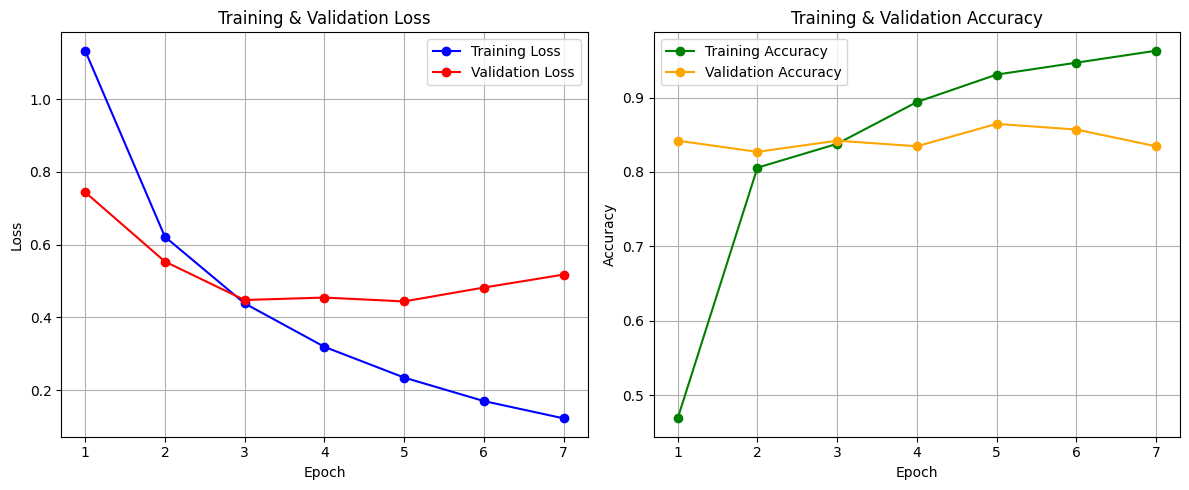

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Data dari hasil training (sesuai log output)
epochs = list(range(1, 8))
train_losses = [1.1330, 0.6215, 0.4384, 0.3191, 0.2346, 0.1700, 0.1225]
val_losses   = [0.7440, 0.5534, 0.4478, 0.4545, 0.4439, 0.4820, 0.5176]
train_accs   = [0.4687, 0.8058, 0.8379, 0.8941, 0.9310, 0.9470, 0.9631]
val_accs     = [0.8421, 0.8271, 0.8421, 0.8346, 0.8647, 0.8571, 0.8346]

# Buat figure dengan ukuran yang lebih besar
plt.figure(figsize=(12, 5))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', color='blue', label='Training Loss')
plt.plot(epochs, val_losses, marker='o', color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, marker='o', color='green', label='Training Accuracy')
plt.plot(epochs, val_accs, marker='o', color='orange', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Simpan grafik sebagai file PNG
plt.savefig("training_validation_plot.png", format="png")
plt.show()

# Unduh file PNG
files.download("training_validation_plot.png")


Evaluasi performa (akurasi, presisi, recall, F1-score)

Tabel Metrik Evaluasi:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value (%)
0,Accuracy,77.04
1,Precision (weighted),74.94
2,Recall (weighted),77.04
3,F1-score (weighted),75.59


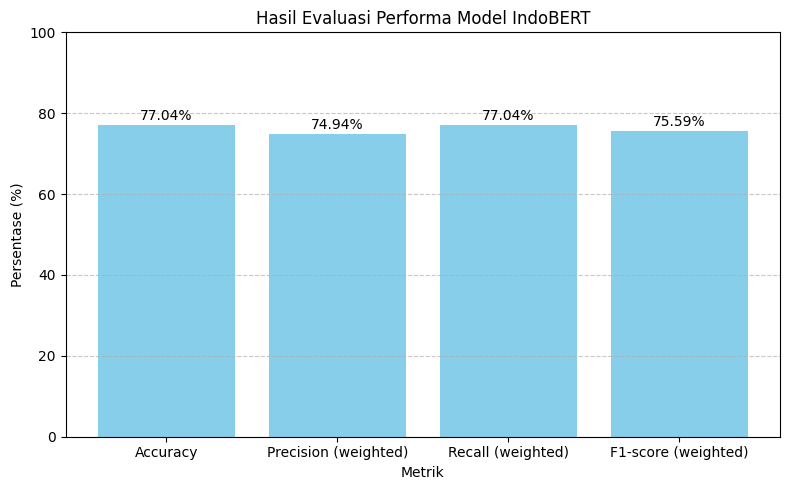

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📌 **Classification Report:**
                        precision    recall  f1-score   support

         Bukan Keluhan       0.89      0.93      0.91       101
 Keluhan Risiko Rendah       0.50      0.35      0.41        20
 Keluhan Risiko Tinggi       0.20      0.38      0.26         8
Keluhan Risiko Ekstrim       0.00      0.00      0.00         6

              accuracy                           0.77       135
             macro avg       0.40      0.41      0.40       135
          weighted avg       0.75      0.77      0.76       135



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from google.colab import files

# 📌 Fungsi Evaluasi pada Test Set
def evaluate_model(model, test_loader):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

# 🚀 Jalankan evaluasi
test_preds, test_labels = evaluate_model(model, test_loader)

# 📌 Hitung Metrik Evaluasi
accuracy = accuracy_score(test_labels, test_preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

# -- Tampilkan dalam bentuk Tabel (DataFrame) --
data = {
    'Metric': [
        'Accuracy',
        'Precision (weighted)',
        'Recall (weighted)',
        'F1-score (weighted)'
    ],
    'Value (%)': [
        f"{accuracy*100:.2f}",
        f"{precision*100:.2f}",
        f"{recall*100:.2f}",
        f"{f1*100:.2f}"
    ]
}
df_metrics = pd.DataFrame(data)
print("Tabel Metrik Evaluasi:")
display(df_metrics)

# -- Tampilkan dalam bentuk grafik batang (bar chart) dan simpan sebagai file PNG --
plt.figure(figsize=(8, 5))
metrics = ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1-score (weighted)']
values = [accuracy*100, precision*100, recall*100, f1*100]

bars = plt.bar(metrics, values, color='skyblue')

# Menambahkan nilai di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.2f}%",
        ha='center',
        va='bottom'
    )

plt.ylim(0, 100)  # Batas atas sumbu y
plt.xlabel("Metrik")
plt.ylabel("Persentase (%)")
plt.title("Hasil Evaluasi Performa Model IndoBERT")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Simpan grafik sebagai file PNG
plt.savefig("evaluasi_model.png", format="png")

# Tampilkan grafik
plt.show()

# Unduh file PNG
files.download("evaluasi_model.png")

# 📌 Print Laporan Klasifikasi
print("\n📌 **Classification Report:**")
print(classification_report(test_labels, test_preds, target_names=list(label_mapping.keys())))


Analisis Confusion Matrix

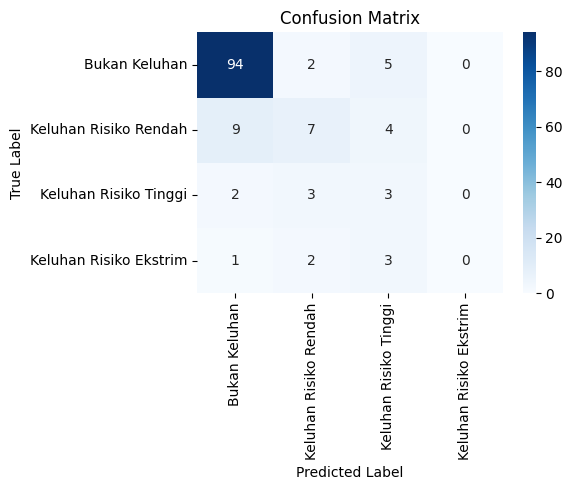

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# 📌 Buat Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
labels = list(label_mapping.keys())  # Nama kelas

# 📌 Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # Pastikan layout tidak terpotong

# Simpan confusion matrix sebagai file PNG
plt.savefig("confusion_matrix.png", format="png")

# Tampilkan plot
plt.show()

# Unduh file PNG
files.download("confusion_matrix.png")


# PENGEMBANGAN MODEL SVM

Arsitektur Model SVM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 🖥️ Import Library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📂 Path dataset baru
dataset_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"

# 📝 Load dataset CSV
df = pd.read_csv(dataset_path)

# 🔍 Cek kolom yang tersedia
print("Kolom dataset:", df.columns)

# 🚀 Pastikan dataset memiliki kolom yang sesuai
required_columns = {'text', 'risk_category'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset harus memiliki kolom: {required_columns}")

# 🔢 Mapping label kategori risiko
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}

df['risk_category'] = df['risk_category'].map(label_mapping)

# 🛠️ Split dataset menjadi train (70%), validation (15%), test (15%)
train_ratio, val_ratio = 0.7, 0.15  # 70% train, 15% validation, 15% test
train_size = int(len(df) * train_ratio)
val_size = int(len(df) * val_ratio)
test_size = len(df) - train_size - val_size

train_df, val_df, test_df = np.split(df.sample(frac=1, random_state=42), [train_size, train_size + val_size])

print("Jumlah data:")
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

# Gabungkan data train dan validation
combined_train = pd.concat([train_df, val_df], ignore_index=True)

# Ekstrak fitur dan label
X_train = combined_train['text']
y_train = combined_train['risk_category']
X_test = test_df['text']
y_test = test_df['risk_category']

# Vektorisasi teks dengan TF-IDF (ngram_range: unigram hingga trigram)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Definisikan parameter grid untuk SVM dengan kernel RBF
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

# Inisialisasi model SVM dengan class_weight='balanced'
svm = SVC(class_weight='balanced')

# Lakukan grid search dengan validasi silang 5-fold
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Tampilkan parameter terbaik dan akurasi cross-validation
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Gunakan model terbaik untuk prediksi pada test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_tfidf)

# Evaluasi performa model
acc = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}%".format(acc * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Jumlah data:
Train: 623, Validation: 133, Test: 135
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 82.01%
Test Set Accuracy: 85.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       107
           1       0.62      0.67      0.65        15
           2       0.75      0.27      0.40        11
           3       0.00      0.00      0.00         2

    accuracy                           0.86       135
   macro avg       0.57      0.48      0.49       135
weighted avg       0.85      0.86      0.84       135

Confusion Matrix:
[[103   4   0   0]
 [  5  10   0   0]
 [  6   1   3   1]
 [  0   1   1   0]]


Hasil Training dan Validasi

Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Jumlah data:
Train: 623, Validation: 134, Test: 134
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 81.64%

--- Cross-Validation Results ---
Training scores per fold: [0.99834711 0.99834711 1.         0.99834983 0.99834983]
Validation scores per fold: [0.80263158 0.81578947 0.82119205 0.81456954 0.82781457]
Rata-rata Training Accuracy: 99.87%
Rata-rata Validation Accuracy: 81.64%


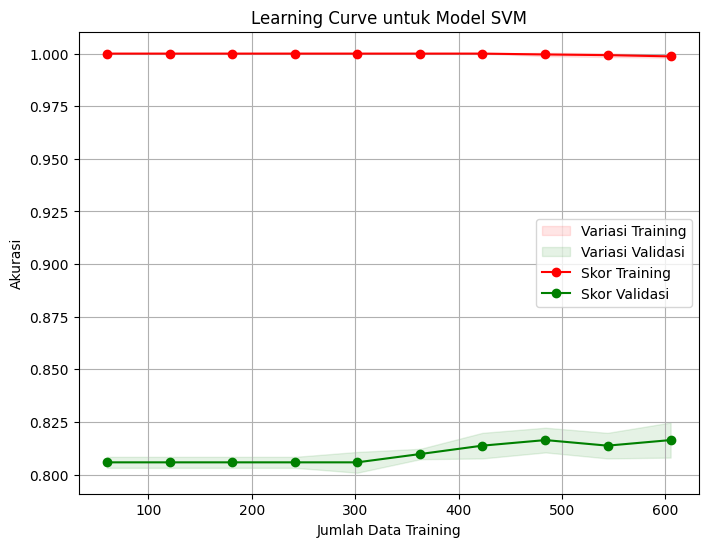

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Evaluasi pada Test Set ---
Test Set Accuracy: 84.33%

Classification Report:
                        precision    recall  f1-score   support

         Bukan Keluhan       0.93      0.95      0.94       108
 Keluhan Risiko Rendah       0.45      0.60      0.51        15
 Keluhan Risiko Tinggi       0.33      0.12      0.18         8
Keluhan Risiko Ekstrim       0.00      0.00      0.00         3

              accuracy                           0.84       134
             macro avg       0.43      0.42      0.41       134
          weighted avg       0.82      0.84      0.83       134

Confusion Matrix:
[[103   5   0   0]
 [  4   9   2   0]
 [  4   3   1   0]
 [  0   3   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 🖥️ Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

# -----------------------------
# 1. Pemuatan Data dan Vektorisasi
# -----------------------------
# 📂 Path dataset baru
dataset_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"

# 📝 Load dataset CSV
df = pd.read_csv(dataset_path)

# 🔍 Cek kolom yang tersedia
print("Kolom dataset:", df.columns)

# 🚀 Pastikan dataset memiliki kolom yang sesuai
required_columns = {'text', 'risk_category'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset harus memiliki kolom: {required_columns}")

# 🔢 Mapping label kategori risiko
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}
df['risk_category'] = df['risk_category'].map(label_mapping)

# 🛠️ Split dataset menjadi 70% train, 15% validation, dan 15% test
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['risk_category'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['risk_category'])

print("Jumlah data:")
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

# Gabungkan data train dan validation untuk proses Grid Search dan learning curve
combined_train = pd.concat([train_df, val_df], ignore_index=True)
X_train = combined_train['text']
y_train = combined_train['risk_category']
X_test = test_df['text']
y_test = test_df['risk_category']

# Vektorisasi teks dengan TF-IDF (ngram_range: unigram hingga trigram, max_features: 10,000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# -----------------------------
# 2. Grid Search dan Model SVM
# -----------------------------
# Definisikan parameter grid untuk SVM dengan kernel RBF
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

# Inisialisasi model SVM dengan class_weight='balanced'
svm = SVC(class_weight='balanced')

# Lakukan grid search dengan validasi silang 5-fold
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Tampilkan parameter terbaik dan akurasi cross-validation
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Dapatkan model terbaik
best_svm = grid_search.best_estimator_

# -----------------------------
# 3. Hasil Training dan Validasi (Cross-Validation)
# -----------------------------
cv_results = cross_validate(
    best_svm,
    X_train_tfidf,
    y_train,
    cv=5,
    return_train_score=True,
    scoring='accuracy',
    n_jobs=-1
)

print("\n--- Cross-Validation Results ---")
print("Training scores per fold:", cv_results['train_score'])
print("Validation scores per fold:", cv_results['test_score'])
print("Rata-rata Training Accuracy: {:.2f}%".format(np.mean(cv_results['train_score']) * 100))
print("Rata-rata Validation Accuracy: {:.2f}%".format(np.mean(cv_results['test_score']) * 100))

# -----------------------------
# 4. Plot Learning Curve
# -----------------------------
train_sizes, train_scores, val_scores = learning_curve(
    best_svm,
    X_train_tfidf,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r", label="Variasi Training")
plt.fill_between(train_sizes,
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std,
                 alpha=0.1, color="g", label="Variasi Validasi")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Skor Training")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Skor Validasi")
plt.xlabel("Jumlah Data Training")
plt.ylabel("Akurasi")
plt.title("Learning Curve untuk Model SVM")
plt.legend(loc="best")
plt.grid(True)

# Simpan gambar sebagai PNG sebelum menampilkannya
plt.savefig('learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Download file learning_curve.png (khusus Google Colab)
files.download('learning_curve.png')

# -----------------------------
# 5. Evaluasi Model pada Test Set
# -----------------------------
y_pred = best_svm.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print("\n--- Evaluasi pada Test Set ---")
print("Test Set Accuracy: {:.2f}%".format(acc * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(label_mapping.keys())))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluasi performa (akurasi, presisi, recall, F1-score)


--- Evaluasi Performa pada Test Set ---
Test Set Accuracy: 84.33%
Precision (weighted): 0.82
Recall (weighted): 0.84
F1-score (weighted): 0.83


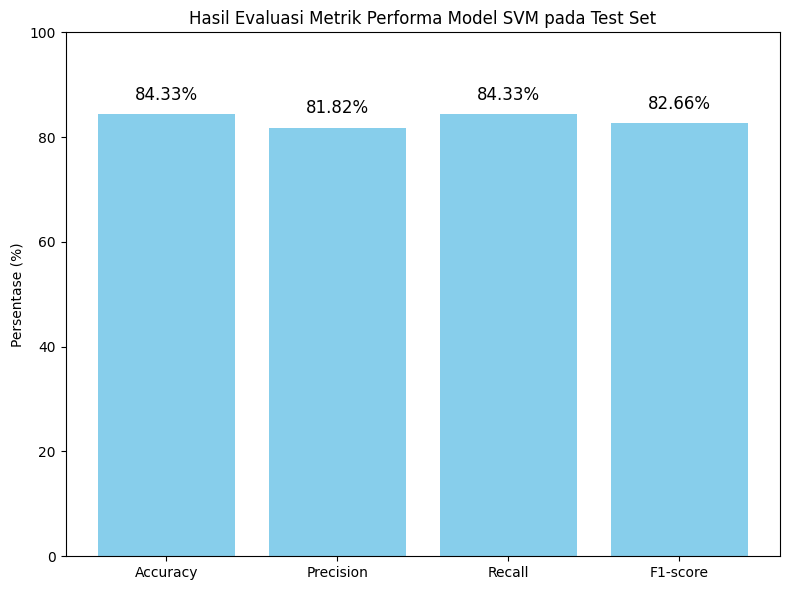

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pastikan bahwa y_test dan y_pred sudah tersedia, misalnya:
# y_pred = best_svm.predict(X_test_tfidf)

# Hitung metrik evaluasi secara terpisah
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Tampilkan hasil evaluasi di konsol
print("\n--- Evaluasi Performa pada Test Set ---")
print("Test Set Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision (weighted): {:.2f}".format(precision))
print("Recall (weighted): {:.2f}".format(recall))
print("F1-score (weighted): {:.2f}".format(f1))

# Buat dictionary untuk metrik
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

# Buat grafik batang untuk menampilkan metrik dalam persentase
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(metrics.keys(), [v * 100 for v in metrics.values()], color='skyblue')
ax.set_ylim(0, 100)
ax.set_ylabel('Persentase (%)')
ax.set_title('Hasil Evaluasi Metrik Performa Model SVM pada Test Set')

# Tambahkan nilai persentase di atas setiap batang
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.2f}%',
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()

# Simpan grafik sebagai file PNG dan tampilkan
plt.savefig("evaluation_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

# Jika menggunakan Google Colab, Anda bisa mendownload file PNG dengan:
# from google.colab import files
# files.download("evaluation_metrics.png")


Analisis Confusion Matrix

Confusion Matrix:
[[103   5   0   0]
 [  4   9   2   0]
 [  4   3   1   0]
 [  0   3   0   0]]


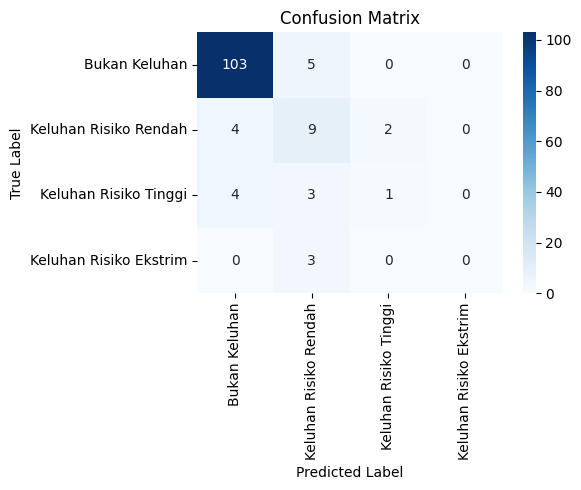

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from google.colab import files

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tentukan label kelas berdasarkan mapping yang telah didefinisikan
class_names = list(label_mapping.keys())

# Tampilkan nilai confusion matrix pada console
print("Confusion Matrix:")
print(cm)

# Visualisasikan confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # Pastikan layout tidak terpotong

# Simpan grafik sebagai file PNG dengan resolusi tinggi
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Jika menggunakan Google Colab, unduh file PNG
files.download("confusion_matrix.png")


#PENGEMBANGAN MODEL ENSEMBLE

ARSITEKTUR MODEL ENSEMBLE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Pastikan Google Drive sudah ter-mount (tidak perlu memanggil drive.mount lagi jika sudah ter-mount)
# from google.colab import drive
# drive.mount('/content/drive')

# Install library yang diperlukan (jika belum terpasang)
!pip install transformers datasets evaluate

# Import libraries
import pandas as pd
import numpy as np
import torch
import evaluate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 1. Muat dataset
data_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"
df = pd.read_csv(data_path)
print("Kolom dataset:", df.columns)
# Gunakan kolom 'text' dan 'risk_category'
df = df[['text', 'risk_category']]

# Encode label menjadi numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['risk_category'])
print("Kelas:", le.classes_)

# 2. Split data secara stratified: 70% training, 15% validasi, 15% test
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['label'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print("Jumlah data training:", len(train_df))
print("Jumlah data validasi:", len(valid_df))
print("Jumlah data test:", len(test_df))

# 3. Fine-tuning IndoBERT untuk klasifikasi dengan Hugging Face Trainer
!pip install transformers datasets --quiet

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Konversi DataFrame ke Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df[['text','label']])
valid_dataset = Dataset.from_pandas(valid_df[['text','label']])
test_dataset  = Dataset.from_pandas(test_df[['text','label']])

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column("label", "labels")
valid_dataset = valid_dataset.rename_column("label", "labels")
test_dataset  = test_dataset.rename_column("label", "labels")

train_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
valid_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

# Load model IndoBERT untuk klasifikasi (sesuaikan num_labels)
num_labels = len(le.classes_)
model_indobert = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# Training arguments dengan 10 epoch dan non-reporting wandb (disable logging)
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=[]  # Nonaktifkan reporting (misalnya, wandb)
)

# Compute metrics
accuracy_metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Buat Trainer dengan validasi terpisah
trainer = Trainer(
    model=model_indobert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

# Fine-tuning IndoBERT
trainer.train()

# Evaluasi IndoBERT pada test set
results_indobert = trainer.evaluate(test_dataset)
print("Hasil Evaluasi IndoBERT:", results_indobert)

# Dapatkan output probabilitas IndoBERT pada test set
indobert_preds = trainer.predict(test_dataset)
indobert_probs = torch.nn.functional.softmax(torch.tensor(indobert_preds.predictions), dim=-1).numpy()

# 4. Membangun Model SVM dengan TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
X_train_tfidf = vectorizer.fit_transform(train_df['text'])
X_valid_tfidf = vectorizer.transform(valid_df['text'])
X_test_tfidf = vectorizer.transform(test_df['text'])

# Optimasi SVM dengan Grid Search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
svm = SVC(kernel='rbf', probability=True)
grid = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_tfidf, train_df['label'])
best_svm = grid.best_estimator_
print("Parameter SVM Terbaik:", grid.best_params_)

# Prediksi probabilitas SVM pada test set
svm_probs = best_svm.predict_proba(X_test_tfidf)

# 5. Pengembangan Model Ensemble
# 5.1 Stacking: Gabungkan probabilitas dari IndoBERT dan SVM sebagai fitur untuk meta-learner
X_meta = np.hstack([indobert_probs, svm_probs])
y_meta = test_df['label'].values

meta_learner = LogisticRegression(max_iter=1000)
meta_learner.fit(X_meta, y_meta)
ensemble_preds_stack = meta_learner.predict(X_meta)
acc_stack = accuracy_score(y_meta, ensemble_preds_stack)
print("Akurasi Ensemble (Stacking):", acc_stack)
print(classification_report(y_meta, ensemble_preds_stack, target_names=le.classes_))

# 5.2 Voting: Gabungkan probabilitas secara sederhana dengan penjumlahan dan ambil argmax
vote_preds = np.argmax(indobert_probs + svm_probs, axis=1)
acc_vote = accuracy_score(y_meta, vote_preds)
print("Akurasi Ensemble (Voting):", acc_vote)
print(classification_report(y_meta, vote_preds, target_names=le.classes_))

# 5.3 Weighted Voting: Terapkan bobot pada masing-masing model (misal, w1 = 0.55 untuk IndoBERT dan w2 = 0.45 untuk SVM)
w1, w2 = 0.55, 0.45
weighted_vote_preds = np.argmax(w1*indobert_probs + w2*svm_probs, axis=1)
acc_weighted_vote = accuracy_score(y_meta, weighted_vote_preds)
print("Akurasi Ensemble (Weighted Voting):", acc_weighted_vote)
print(classification_report(y_meta, weighted_vote_preds, target_names=le.classes_))


Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Kelas: ['Bukan Keluhan' 'Keluhan Risiko Ekstrim' 'Keluhan Risiko Rendah'
 'Keluhan Risiko Tinggi']
Jumlah data training: 623
Jumlah data validasi: 134
Jumlah data test: 134


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/623 [00:00<?, ? examples/s]

Map:   0%|          | 0/134 [00:00<?, ? examples/s]

Map:   0%|          | 0/134 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.459548,0.813433
2,No log,0.442064,0.828358
3,0.504800,0.434065,0.835821
4,0.504800,0.483261,0.858209
5,0.244900,0.482027,0.843284
6,0.244900,0.493115,0.850746
7,0.244900,0.537872,0.850746
8,0.104900,0.555735,0.828358
9,0.104900,0.553899,0.858209
10,0.045900,0.560855,0.865672


Hasil Evaluasi IndoBERT: {'eval_loss': 0.56264728307724, 'eval_accuracy': 0.8656716417910447, 'eval_runtime': 0.9129, 'eval_samples_per_second': 146.784, 'eval_steps_per_second': 5.477, 'epoch': 10.0}
Parameter SVM Terbaik: {'C': 10, 'gamma': 0.1}
Akurasi Ensemble (Stacking): 0.8731343283582089
                        precision    recall  f1-score   support

         Bukan Keluhan       0.94      0.96      0.95       108
Keluhan Risiko Ekstrim       0.00      0.00      0.00         3
 Keluhan Risiko Rendah       0.55      0.80      0.65        15
 Keluhan Risiko Tinggi       1.00      0.12      0.22         8

              accuracy                           0.87       134
             macro avg       0.62      0.47      0.46       134
          weighted avg       0.88      0.87      0.85       134

Akurasi Ensemble (Voting): 0.8656716417910447
                        precision    recall  f1-score   support

         Bukan Keluhan       0.97      0.94      0.95       108
Keluhan Risiko

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TRAINING DAN VALIDASI

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AdamW, get_linear_schedule_with_warmup
from tqdm.auto import tqdm

# Pastikan train_dataset dan valid_dataset sudah di-set format torch, misalnya:
# train_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
# valid_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

# Buat DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32)

# Pilih device (cuda jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Menggunakan device:", device)
model_indobert.to(device)

# Inisialisasi optimizer dan scheduler
optimizer = AdamW(model_indobert.parameters(), lr=2e-5)
num_epochs = 10
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Loop training dan validasi per epoch
for epoch in range(1, num_epochs+1):
    # Training
    model_indobert.train()
    total_train_loss = 0.0
    total_train_correct = 0
    total_train_samples = 0

    train_loop = tqdm(train_dataloader, desc=f"Training Epoch {epoch}", leave=False)
    for batch in train_loop:
        optimizer.zero_grad()

        # Pindahkan data ke device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_indobert(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        scheduler.step()

        batch_size = input_ids.size(0)
        total_train_loss += loss.item() * batch_size
        preds = torch.argmax(logits, dim=1)
        total_train_correct += (preds == labels).sum().item()
        total_train_samples += batch_size

        train_loop.set_postfix(loss=loss.item())

    avg_train_loss = total_train_loss / total_train_samples
    train_accuracy = total_train_correct / total_train_samples

    # Validasi
    model_indobert.eval()
    total_val_loss = 0.0
    total_val_correct = 0
    total_val_samples = 0
    with torch.no_grad():
        val_loop = tqdm(valid_dataloader, desc=f"Validation Epoch {epoch}", leave=False)
        for batch in val_loop:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model_indobert(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            batch_size = input_ids.size(0)
            total_val_loss += loss.item() * batch_size
            preds = torch.argmax(logits, dim=1)
            total_val_correct += (preds == labels).sum().item()
            total_val_samples += batch_size

            val_loop.set_postfix(loss=loss.item())

    avg_val_loss = total_val_loss / total_val_samples
    val_accuracy = total_val_correct / total_val_samples

    print(f"\nEpoch {epoch}/{num_epochs} Summary:")
    print(f"  Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
    print(f"  Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}\n")


Menggunakan device: cuda


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 1:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 1/10 Summary:
  Training Loss: 0.0614, Training Accuracy: 0.9839
  Validation Loss: 0.6213, Validation Accuracy: 0.8209



Training Epoch 2:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 2:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 2/10 Summary:
  Training Loss: 0.0572, Training Accuracy: 0.9823
  Validation Loss: 0.7344, Validation Accuracy: 0.7985



Training Epoch 3:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 3:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 3/10 Summary:
  Training Loss: 0.0332, Training Accuracy: 0.9888
  Validation Loss: 0.6960, Validation Accuracy: 0.7910



Training Epoch 4:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 4:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 4/10 Summary:
  Training Loss: 0.0115, Training Accuracy: 0.9984
  Validation Loss: 0.7164, Validation Accuracy: 0.7985



Training Epoch 5:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 5:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 5/10 Summary:
  Training Loss: 0.0063, Training Accuracy: 1.0000
  Validation Loss: 0.7557, Validation Accuracy: 0.8060



Training Epoch 6:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 6:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 6/10 Summary:
  Training Loss: 0.0048, Training Accuracy: 1.0000
  Validation Loss: 0.7399, Validation Accuracy: 0.8134



Training Epoch 7:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 7:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 7/10 Summary:
  Training Loss: 0.0041, Training Accuracy: 1.0000
  Validation Loss: 0.7529, Validation Accuracy: 0.8134



Training Epoch 8:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 8:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 8/10 Summary:
  Training Loss: 0.0050, Training Accuracy: 0.9984
  Validation Loss: 0.8328, Validation Accuracy: 0.8060



Training Epoch 9:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 9:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 9/10 Summary:
  Training Loss: 0.0035, Training Accuracy: 1.0000
  Validation Loss: 0.8098, Validation Accuracy: 0.7985



Training Epoch 10:   0%|          | 0/20 [00:00<?, ?it/s]

Validation Epoch 10:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 10/10 Summary:
  Training Loss: 0.0032, Training Accuracy: 1.0000
  Validation Loss: 0.8024, Validation Accuracy: 0.7985



Evaluasi performa (akurasi, presisi, recall, F1-score)

In [ ]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Buat DataLoader untuk test set (batch size bisa disesuaikan)
test_dataloader = DataLoader(test_dataset, batch_size=32)

# Set model ke mode evaluasi
model_indobert.eval()
all_preds = []
all_labels = []

# Nonaktifkan perhitungan gradien
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_indobert(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Hitung metrik evaluasi
acc = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

print("Test Accuracy: {:.4f}".format(acc))
print("Test Precision: {:.4f}".format(precision))
print("Test Recall: {:.4f}".format(recall))
print("Test F1-score: {:.4f}".format(f1))
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_, zero_division=0))


Test Accuracy: 0.8507
Test Precision: 0.8597
Test Recall: 0.8507
Test F1-score: 0.8526

Classification Report:
                        precision    recall  f1-score   support

         Bukan Keluhan       0.97      0.93      0.95       108
Keluhan Risiko Ekstrim       0.00      0.00      0.00         3
 Keluhan Risiko Rendah       0.57      0.80      0.67        15
 Keluhan Risiko Tinggi       0.22      0.25      0.24         8

              accuracy                           0.85       134
             macro avg       0.44      0.49      0.46       134
          weighted avg       0.86      0.85      0.85       134



CONFUSION MATRIX

Confusion Matrix:
 [[100   0   5   3]
 [  0   0   1   2]
 [  1   0  12   2]
 [  2   1   3   2]]


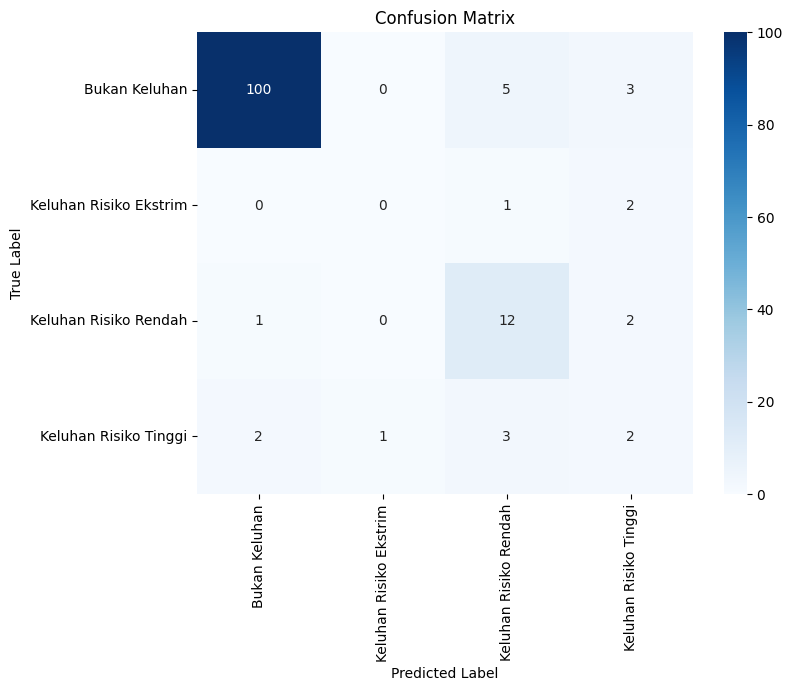

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Hitung confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Simpan plot sebagai file PNG
plt.savefig("confusion_matrix.png", format="png")
plt.show()

# Unduh file PNG
files.download("confusion_matrix.png")
